In [6]:
from sklearn.datasets import load_wine

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
import numpy as np

## Dataset: Wine

In [10]:
wine = load_wine(as_frame=True)

In [11]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

The dataset contains 178 samples of wine, each with 13 features (each a chemical property)

In [12]:
wine.data.shape

(178, 13)

There are three different wine in the dataset.

In [13]:
set(wine.target)

{0, 1, 2}

In [14]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Simplify dataset to binary classification

To get started, let us simplify the dataset to contain only 2 classes, not 3. We simply discard wine_2.

In [15]:
x_binary = wine.data[wine.target < 2]  # ignore wine 2
x_binary

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0


In [16]:
y_binary = wine.target[wine.target < 2]
y_binary

0      0
1      0
2      0
3      0
4      0
      ..
125    1
126    1
127    1
128    1
129    1
Name: target, Length: 130, dtype: int64

## Preprocess data to ensure convergence

In [17]:
scaler = StandardScaler()
scaler.fit(x_binary)

StandardScaler()

In [19]:
# transform X into its z-scores (zero mean, and standard deviation of 1)
x_binary_norm = scaler.transform(x_binary)
x_binary_norm

array([[ 1.452455  , -0.29441432,  0.30247764, ..., -0.11242761,
         2.04002469,  0.782868  ],
       [ 0.28906609, -0.21455828, -0.67719651, ..., -0.05291788,
         0.94143735,  0.74015178],
       [ 0.24388594,  0.4471061 ,  1.11324246, ..., -0.17193734,
         0.45552372,  1.12459784],
       ...,
       [-1.30353427,  0.18472195,  1.484843  , ..., -0.52899571,
        -1.0867239 , -0.92293343],
       [-0.64842207, -0.38567837, -0.13668663, ..., -1.00507355,
        -0.36841679, -1.27605426],
       [-1.02115832,  2.66025935,  0.13356831, ..., -1.60017084,
        -0.81207706, -0.59829008]])

## Train binary classifier

In [20]:
bin_classifier = LogisticRegression(random_state=0).fit(x_binary_norm, y_binary)

## Using the classifier for prediction

In [23]:
bin_classifier.predict(x_binary_norm)
# >>> clf.predict(X[:2, :])
# array([0, 0])
# >>> clf.predict_proba(X[:2, :])
# array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
#        [9.7...e-01, 2.8...e-02, ...e-08]])
# >>> clf.score(X, y)
# 0.97...

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
bin_classifier.score(x_binary_norm, y_binary)

1.0

## Which features does the model take into account the most?

In [25]:
bin_classifier.coef_.shape

(1, 13)

In [26]:
for coef, feat in zip(np.exp(bin_classifier.coef_[0]), wine.feature_names):
    print(f"{coef:.5f} {feat}")

0.21404 alcohol
0.61018 malic_acid
0.37851 ash
3.45508 alcalinity_of_ash
0.78857 magnesium
0.96703 total_phenols
0.71856 flavanoids
1.19135 nonflavanoid_phenols
1.20535 proanthocyanins
0.45094 color_intensity
1.16339 hue
0.53400 od280/od315_of_diluted_wines
0.16310 proline


## Multi-class logistic regression

In [27]:
# dataset
x, y = wine.data, wine.target
x.shape, y.shape

((178, 13), (178,))

In [28]:
# scale data
multi_scaler = StandardScaler().fit(x)
x_norm = multi_scaler.transform(x)

In [29]:
multi_classifier = LogisticRegression(multi_class='ovr'  # ovr: one-vs-rest
                                     ).fit(x_norm, y)

In [30]:
multi_classifier.predict(x_norm)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [31]:
for prob_0, prob_1, prob_2 in multi_classifier.predict_proba(x_norm):
    print(f'{prob_0:.3f}  {prob_1:.3f}  {prob_2:.3f}')

0.998  0.002  0.000
0.968  0.032  0.000
0.994  0.005  0.001
0.997  0.000  0.003
0.895  0.095  0.010
0.998  0.000  0.002
0.998  0.000  0.002
0.992  0.000  0.008
0.996  0.003  0.001
0.997  0.002  0.001
0.999  0.001  0.000
0.994  0.003  0.004
0.997  0.002  0.002
0.998  0.002  0.000
1.000  0.000  0.000
0.994  0.000  0.006
0.985  0.000  0.014
0.991  0.003  0.006
0.999  0.000  0.001
0.994  0.003  0.003
0.968  0.032  0.000
0.944  0.052  0.003
0.952  0.048  0.000
0.883  0.117  0.001
0.828  0.171  0.000
0.801  0.192  0.007
0.995  0.003  0.003
0.968  0.028  0.004
0.969  0.031  0.001
0.985  0.015  0.001
0.993  0.006  0.001
0.997  0.001  0.002
0.847  0.153  0.000
0.990  0.005  0.005
0.979  0.014  0.007
0.914  0.085  0.001
0.980  0.014  0.007
0.948  0.046  0.006
0.670  0.329  0.000
0.996  0.001  0.003
0.959  0.041  0.000
0.960  0.033  0.007
0.999  0.001  0.001
0.889  0.098  0.013
0.807  0.193  0.000
0.962  0.000  0.037
0.997  0.002  0.001
0.990  0.010  0.000
0.992  0.004  0.003
0.998  0.000  0.002


In [32]:
multi_classifier.score(x_norm, y)

1.0

## Multiclass logistic regression: Multinomial vs one-vs-rest

Multinomial: https://en.wikipedia.org/wiki/Multinomial_logistic_regression
TODO

## Binary logistic regression with Keras

In [3]:
from tensorflow import keras

In [47]:
from matplotlib import pyplot as plt


In [35]:
num_features = 13
model_binary = keras.Sequential()
model_binary.add(keras.layers.Dense(1, input_shape=(num_features,), activation='sigmoid'))

In [58]:
# Without normalization: Tough
model_binary.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
history_binary = model_binary.fit(
  x=x_binary,
  y=y_binary,
  shuffle=True,
  epochs=100,
  batch_size=8,
  verbose=0
)

In [59]:
# With normalized data: better!
model_binary.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
history_binary_norm = model_binary.fit(
  x=x_binary_norm,
  y=y_binary,
  shuffle=True,
  epochs=100,
  batch_size=8,
  verbose=0
)

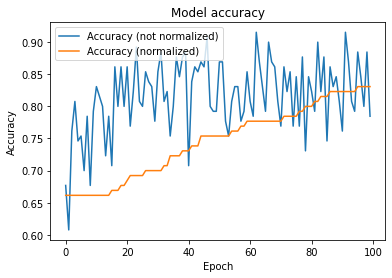

In [60]:
plt.plot(history_binary.history['binary_accuracy'], label='Accuracy (not normalized)')
plt.plot(history_binary_norm.history['binary_accuracy'], label='Accuracy (normalized)')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()